In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-ai-on-digital-media-2020-2025/Global_AI_Content_Impact_Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/impact-of-ai-on-digital-media-2020-2025/Global_AI_Content_Impact_Dataset.csv')

In [3]:
df

Country  Year    Industry  AI Adoption Rate (%)  \
0    South Korea  2022       Media                 44.29   
1          China  2025       Legal                 34.75   
2            USA  2022  Automotive                 81.06   
3         France  2021       Legal                 85.24   
4         France  2021      Gaming                 78.95   
..           ...   ...         ...                   ...   
195      Germany  2021  Automotive                 89.44   
196      Germany  2020       Media                 70.11   
197       France  2023   Marketing                 65.77   
198    Australia  2023  Automotive                 45.35   
199  South Korea  2020  Healthcare                 10.53   

     AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                         33.09                   16.77   
1                                         66.74                   46.89   
2                                         96.13                   10.66   
3                                         93.76                   27.70   
4                                         45.62                   17.45   
..                                          ...                     ...   
195                                       52.98                   48.47   
196                                       28.26                   27.62   
197                                       49.83                   39.94   
198                                       20.49                   33.21   
199                                       20.97                   23.64   

     Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                             46.12                            74.79   
1                             52.46                            26.17   
2                             45.60                            39.66   
3                             78.24                            29.45   
4                              1.05                            21.70   
..                              ...                              ...   
195                           12.14                            30.60   
196                           57.86                            58.71   
197                           79.44                            43.73   
198                           50.50                            41.73   
199                           34.27                            45.67   

    Top AI Tools Used Regulation Status  Consumer Trust in AI (%)  \
0                Bard            Strict                     40.77   
1              DALL-E            Strict                     35.67   
2    Stable Diffusion          Moderate                     54.47   
3              Claude          Moderate                     51.84   
4          Midjourney            Strict                     41.77   
..                ...               ...                       ...   
195            DALL-E           Lenient                     77.21   
196            DALL-E            Strict                     78.74   
197         Synthesia           Lenient                     81.58   
198            Claude            Strict                     47.42   
199  Stable Diffusion          Moderate                     58.52   

     Market Share of AI Companies (%)  
0                               18.73  
1                               35.02  
2                               22.76  
3                                1.93  
4                               21.41  
..                                ...  
195                             44.35  
196                             31.73  
197                             14.62  
198                             43.11  
199                             33.37  

[200 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

In [5]:
df.isnull().sum()

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64

In [6]:
df.describe()

Year  AI Adoption Rate (%)  \
count   200.000000            200.000000   
mean   2022.315000             54.265850   
std       1.825496             24.218067   
min    2020.000000             10.530000   
25%    2021.000000             33.222500   
50%    2022.000000             53.310000   
75%    2024.000000             76.220000   
max    2025.000000             94.760000   

       AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
count                                   200.00000              200.000000   
mean                                     46.07260               25.788250   
std                                      29.16122               13.901105   
min                                       1.04000                0.090000   
25%                                      20.32250               14.995000   
50%                                      44.32000               25.735000   
75%                                      71.62000               37.417500   
max                                      99.06000               49.710000   

       Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
count                      200.000000                       200.000000   
mean                        39.719450                        54.102150   
std                         23.829545                        19.247079   
min                          0.140000                        20.210000   
25%                         17.907500                        37.770000   
50%                         42.100000                        54.515000   
75%                         58.697500                        69.402500   
max                         79.550000                        88.290000   

       Consumer Trust in AI (%)  Market Share of AI Companies (%)  
count                200.000000                        200.000000  
mean                  59.425150                         26.569550  
std                   17.319668                         14.023729  
min                   30.120000                          1.180000  
25%                   44.755000                         14.052500  
50%                   59.215000                         27.390000  
75%                   74.885000                         38.432500  
max                   89.880000                         49.280000

In [7]:
df.columns

Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')

# DATA VIZULATIZATION

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

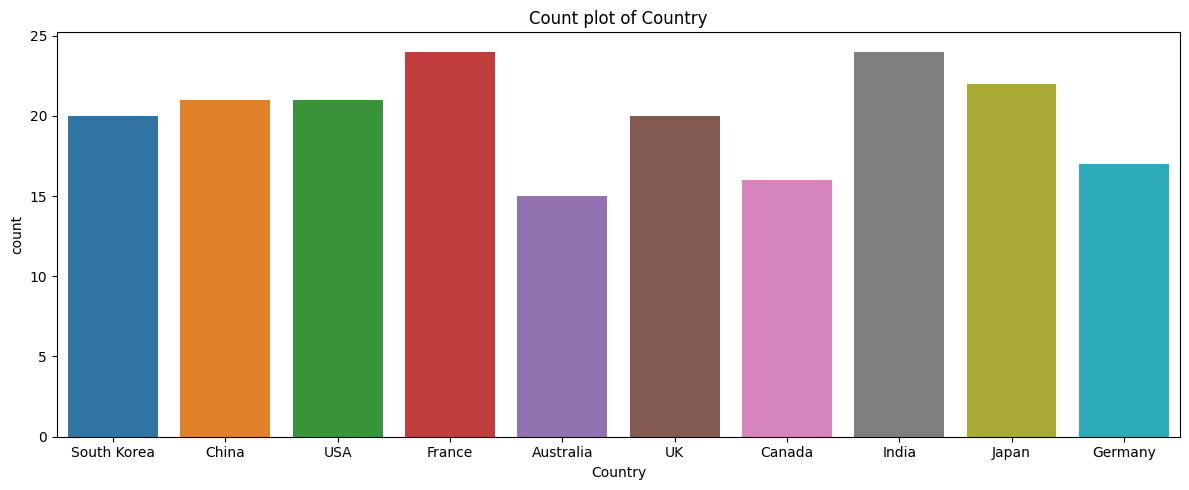

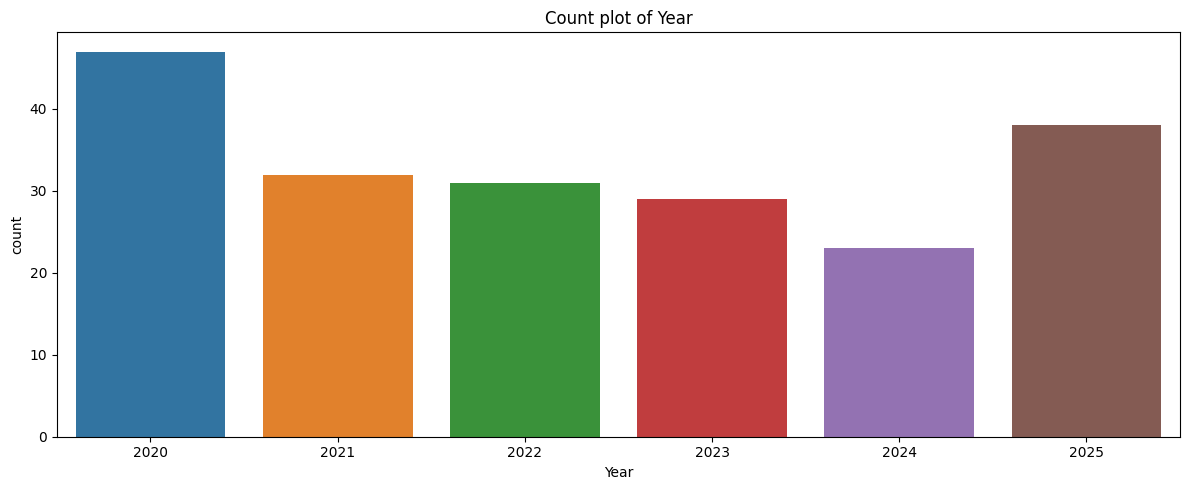

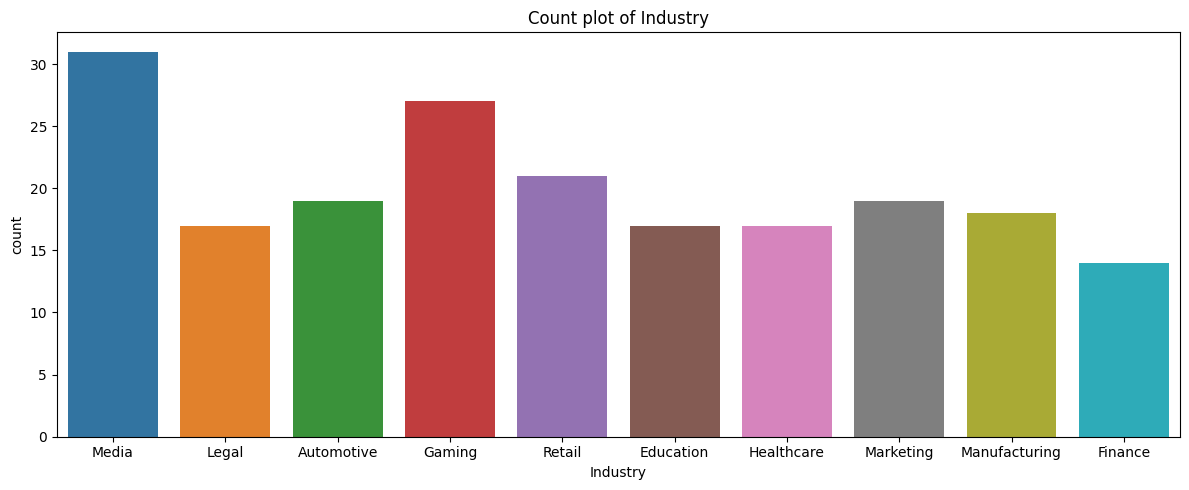

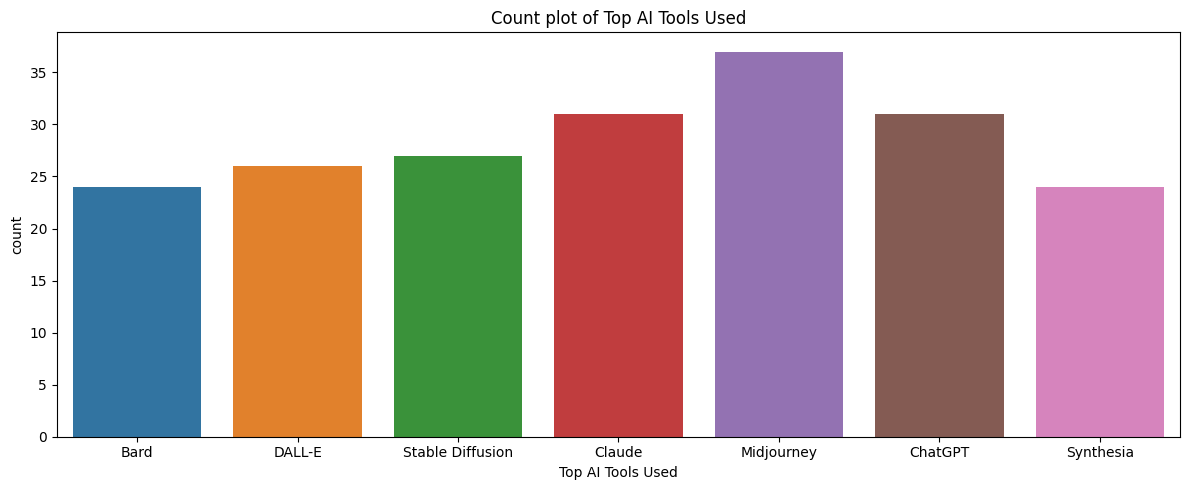

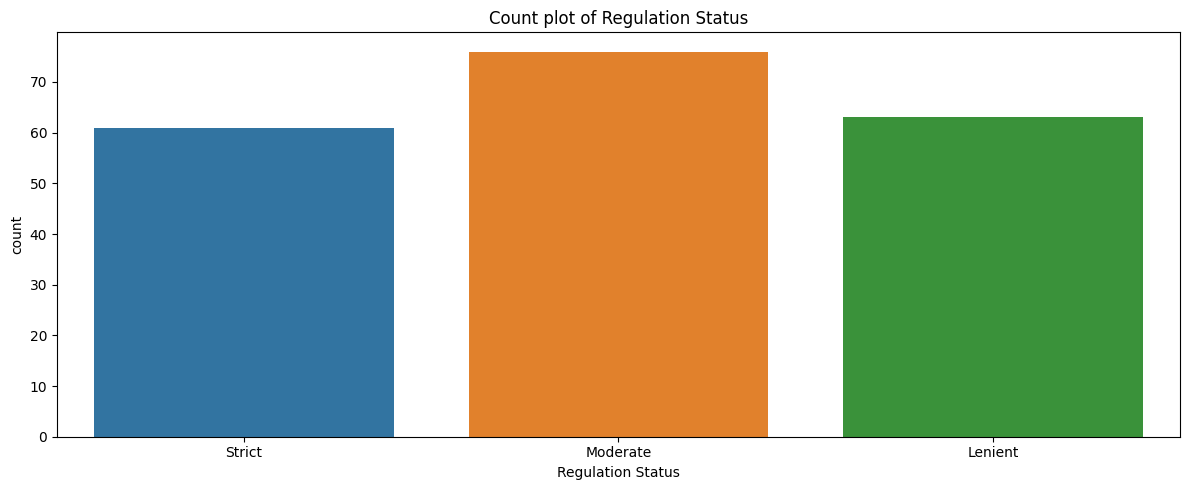

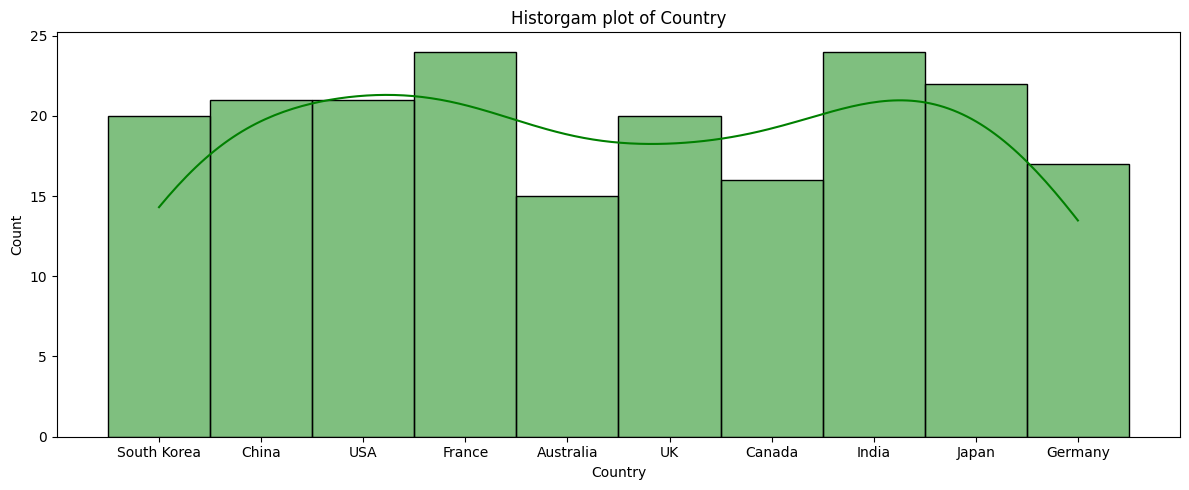

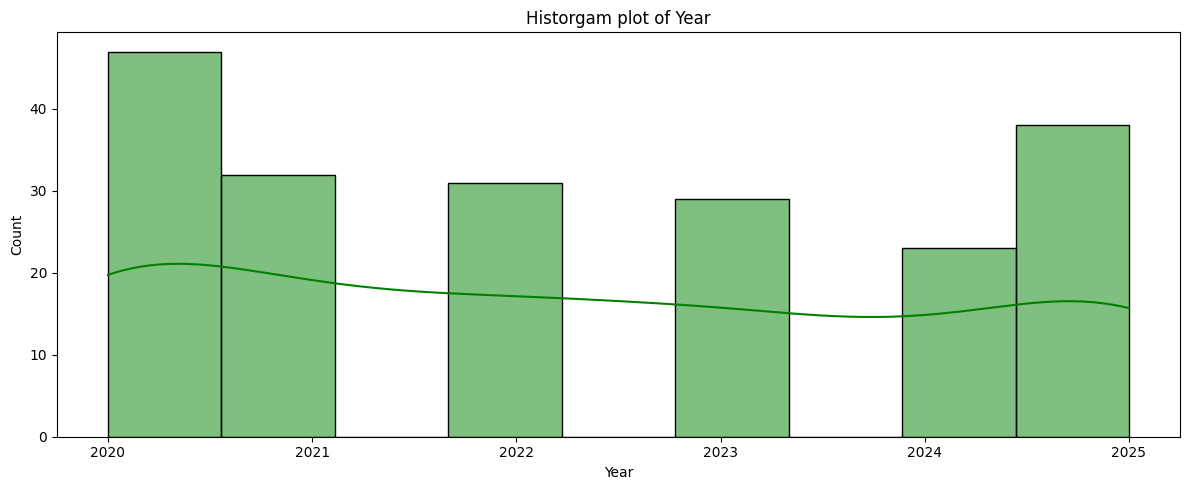

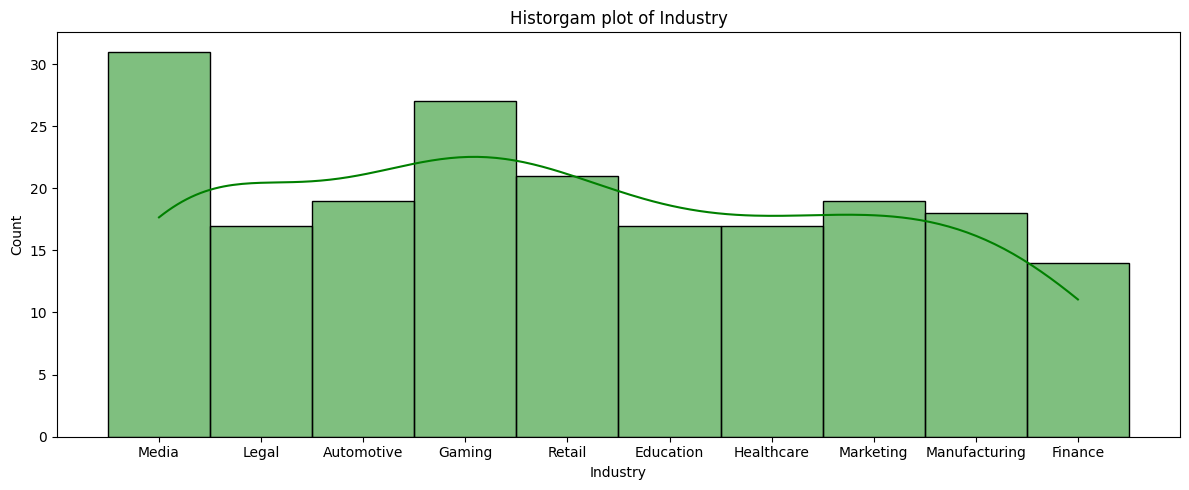

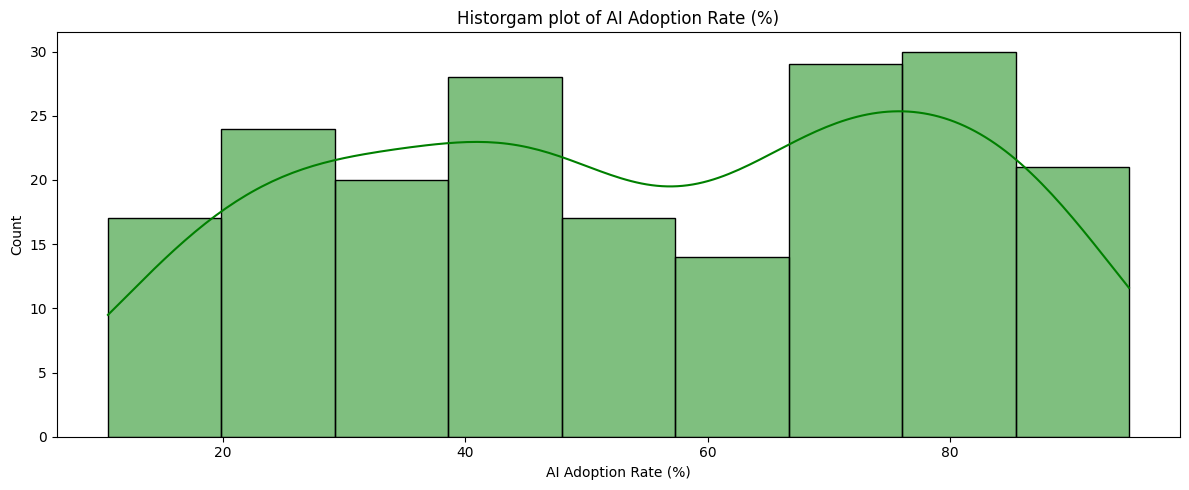

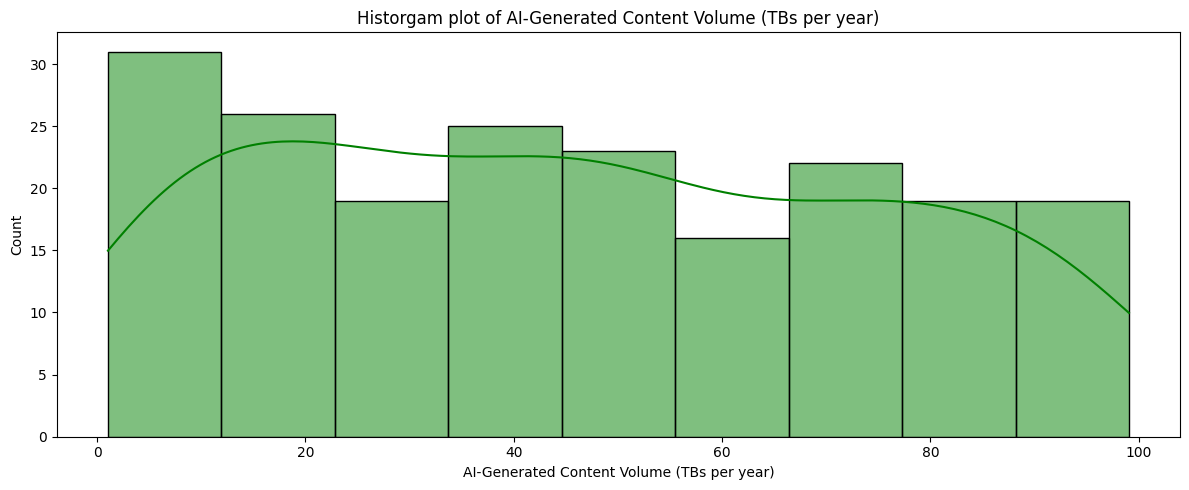

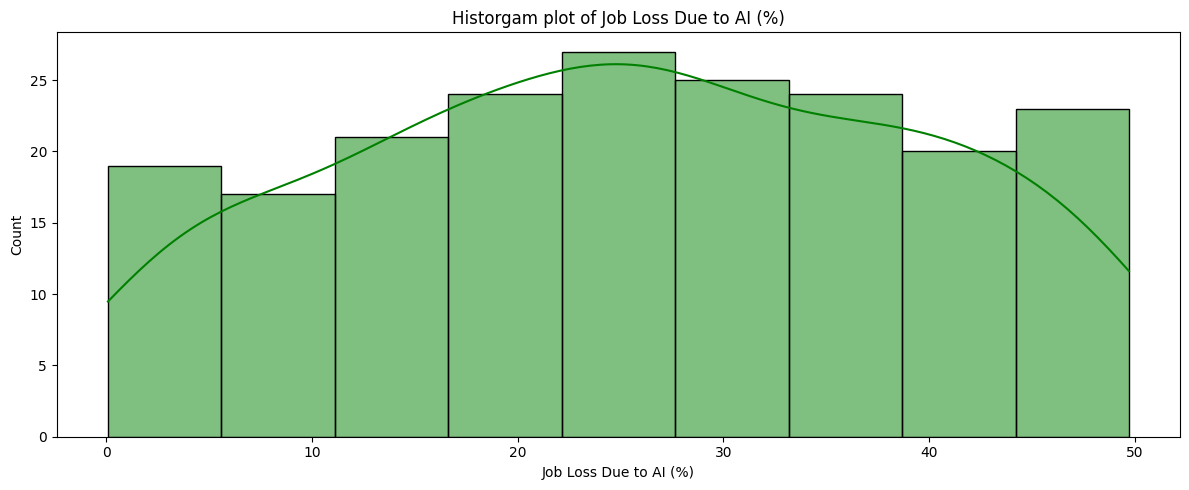

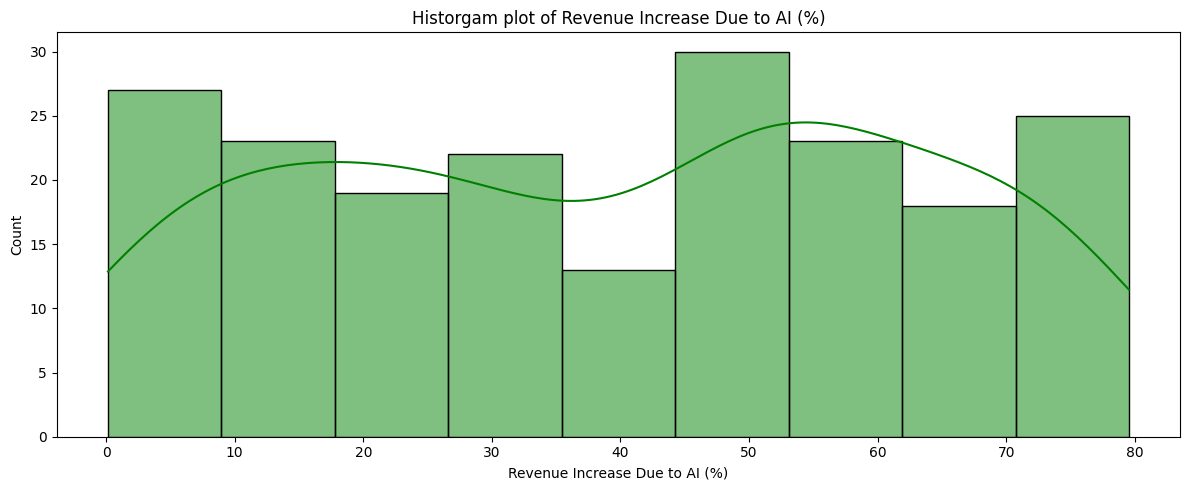

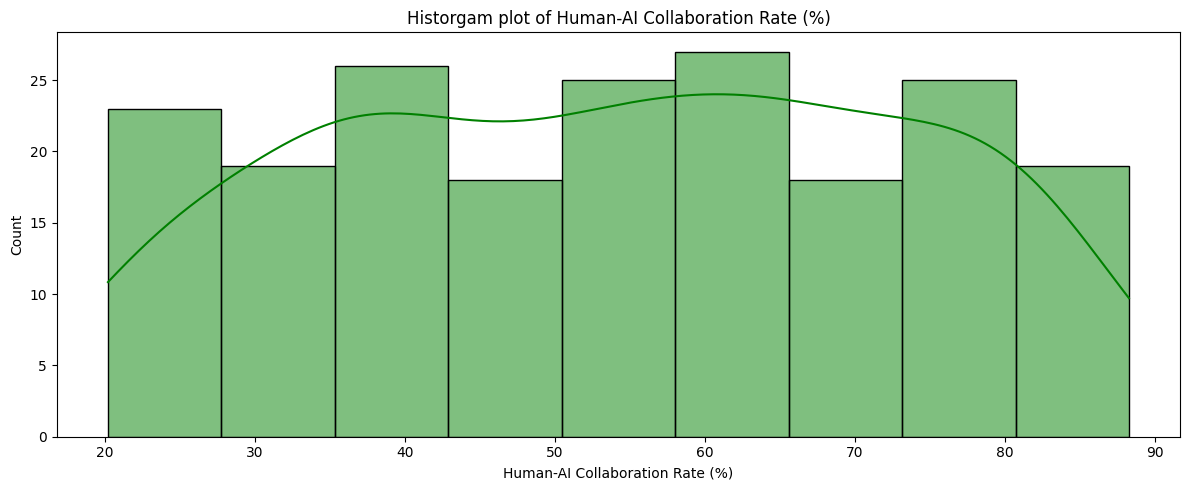

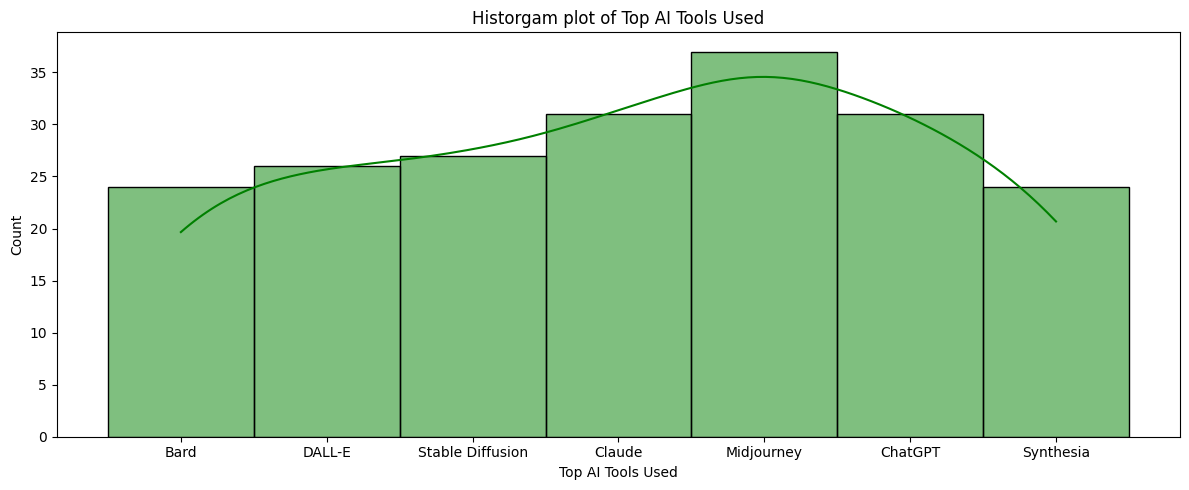

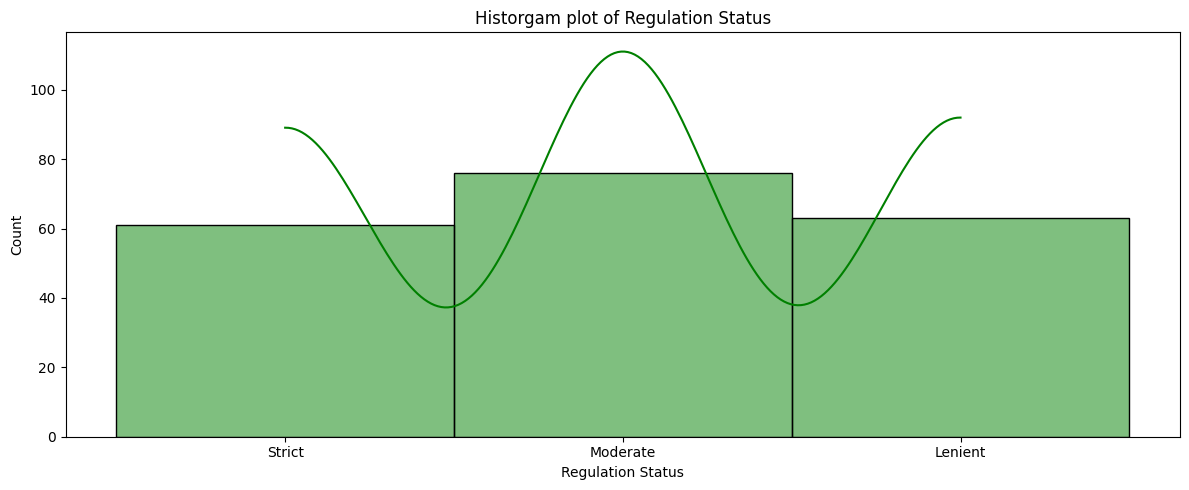

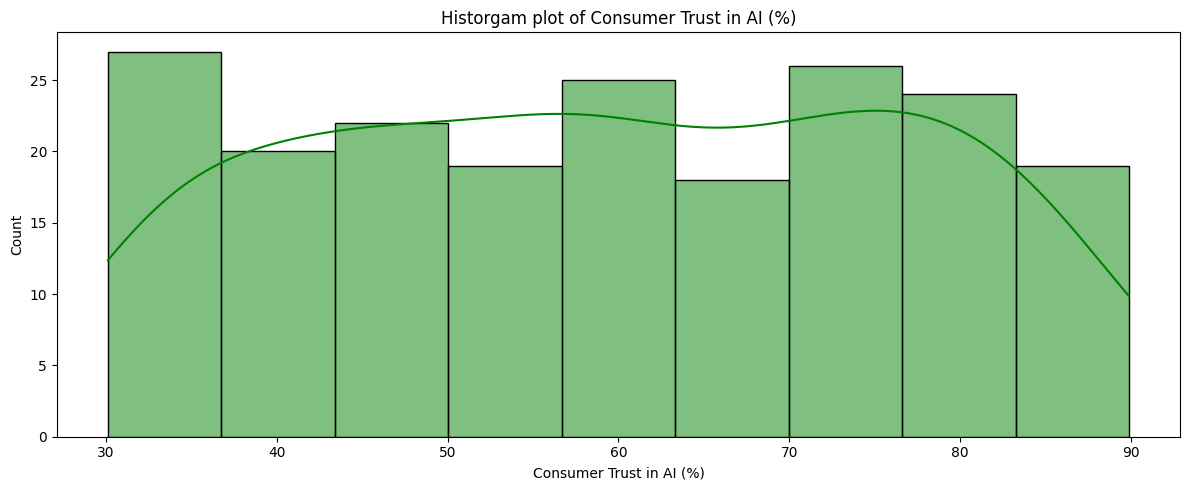

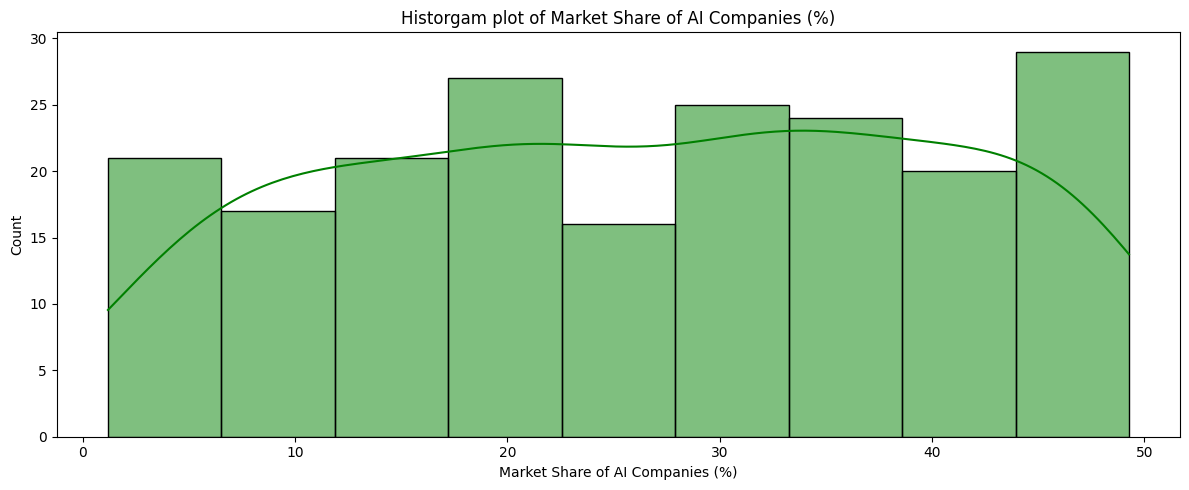

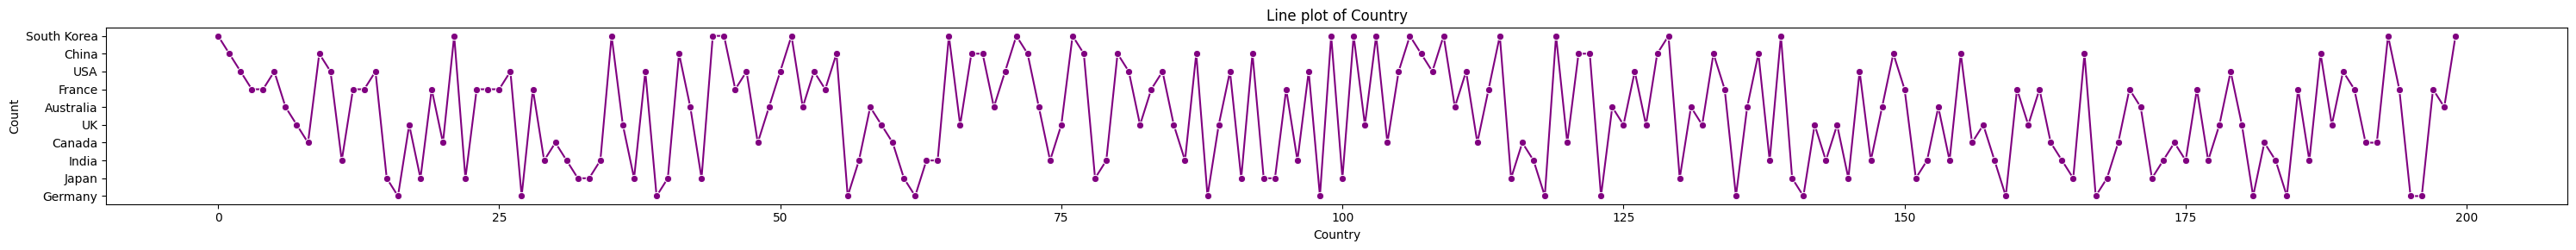

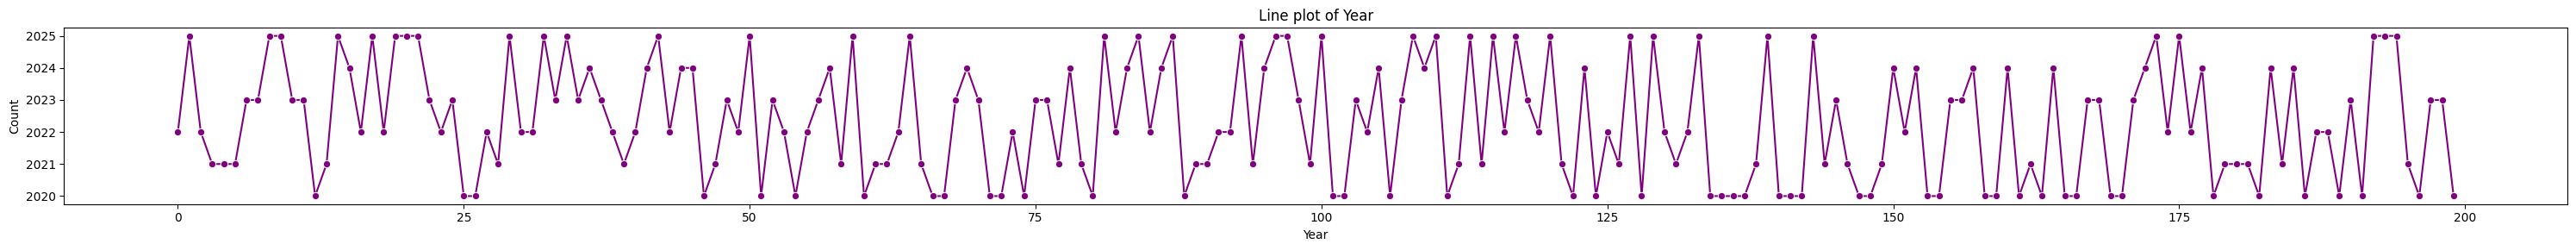

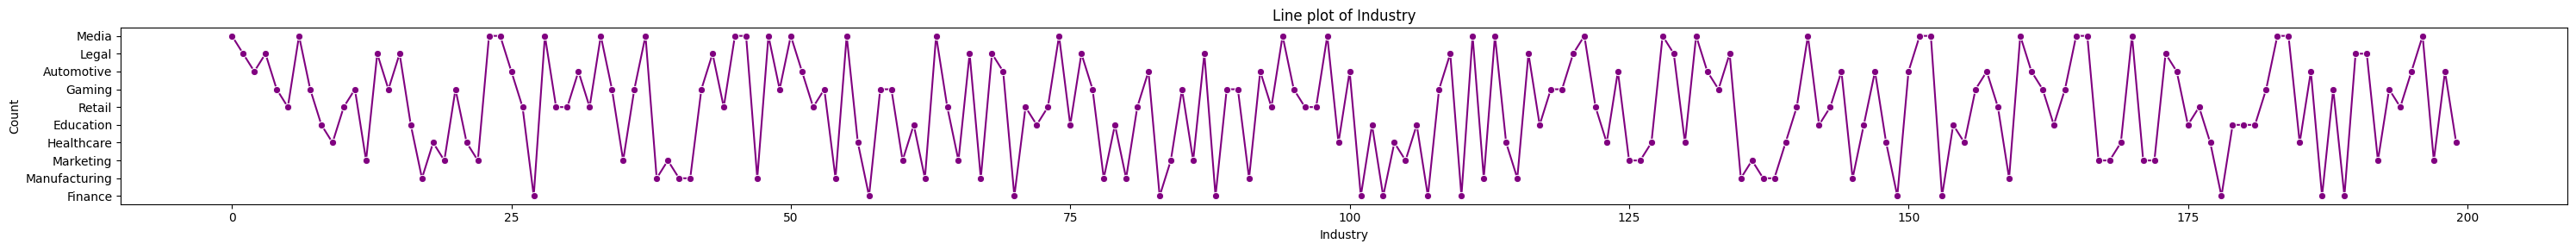

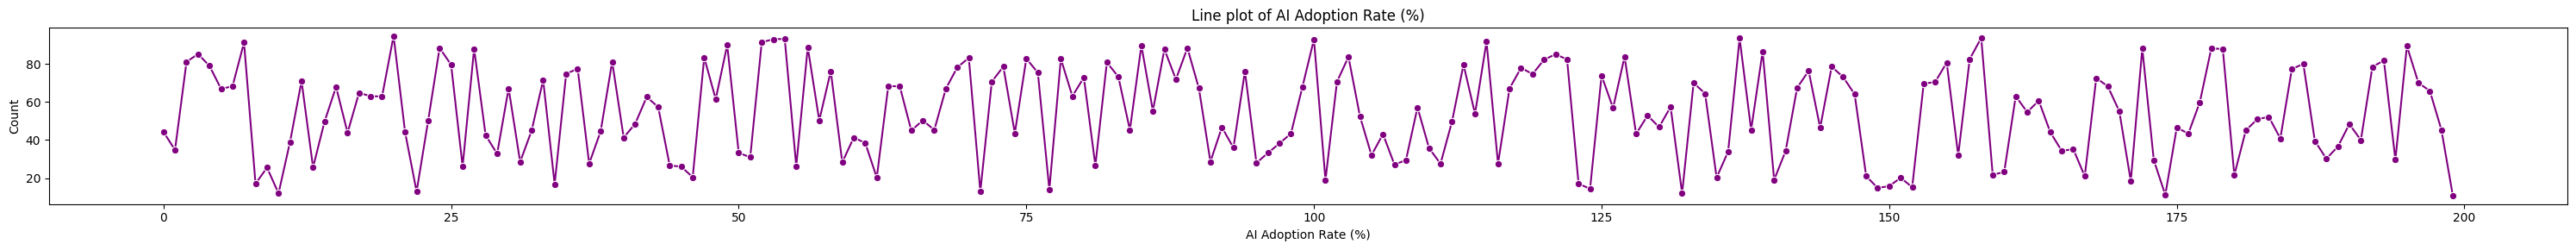

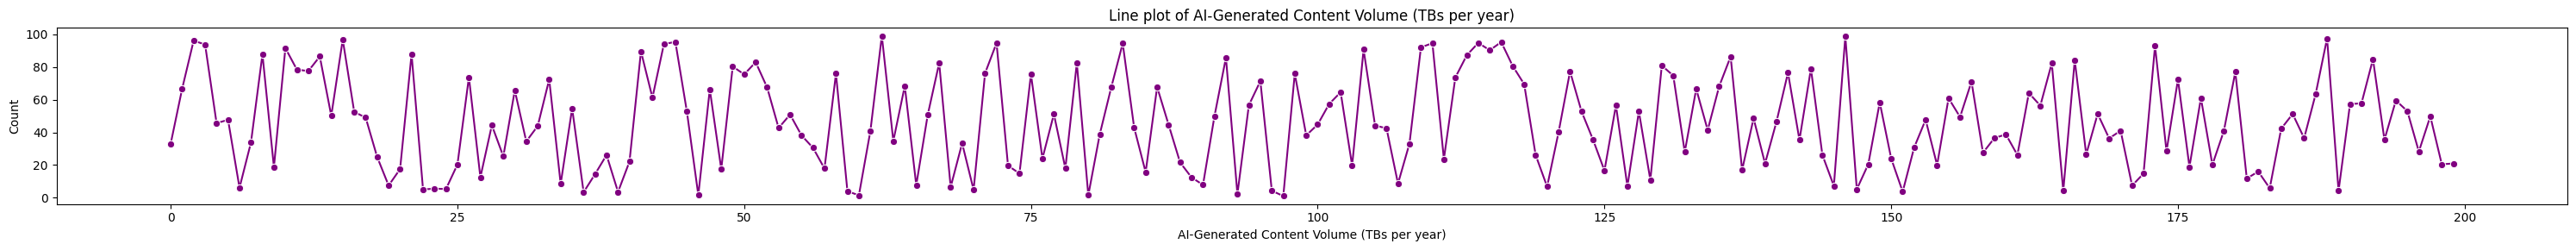

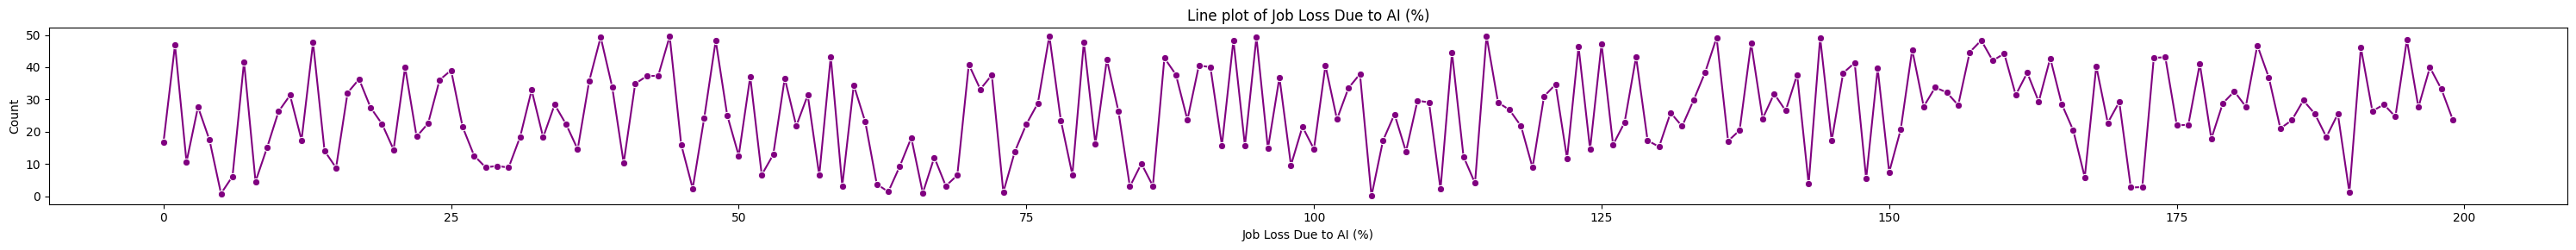

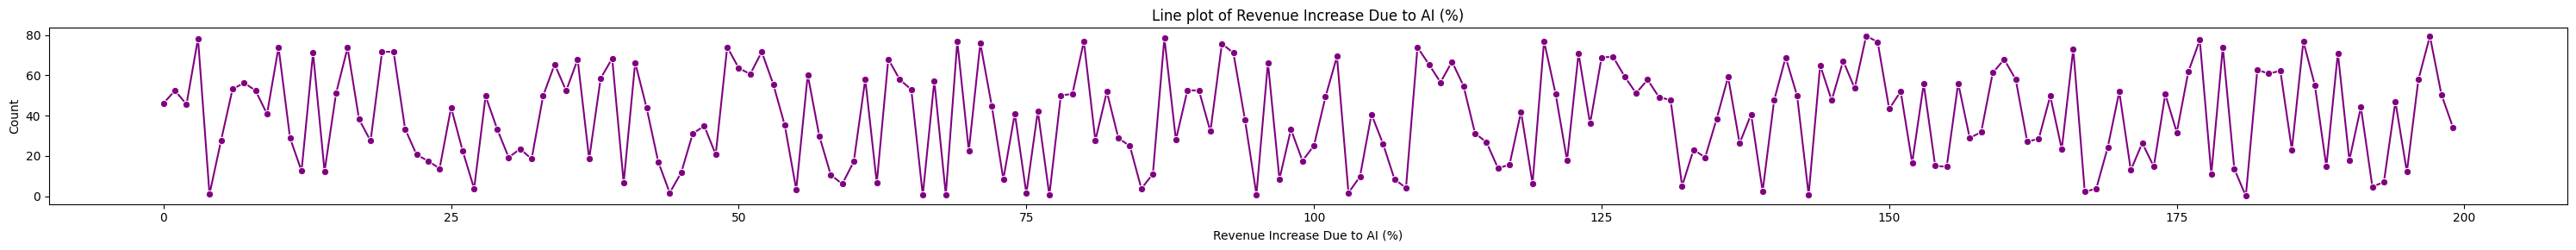

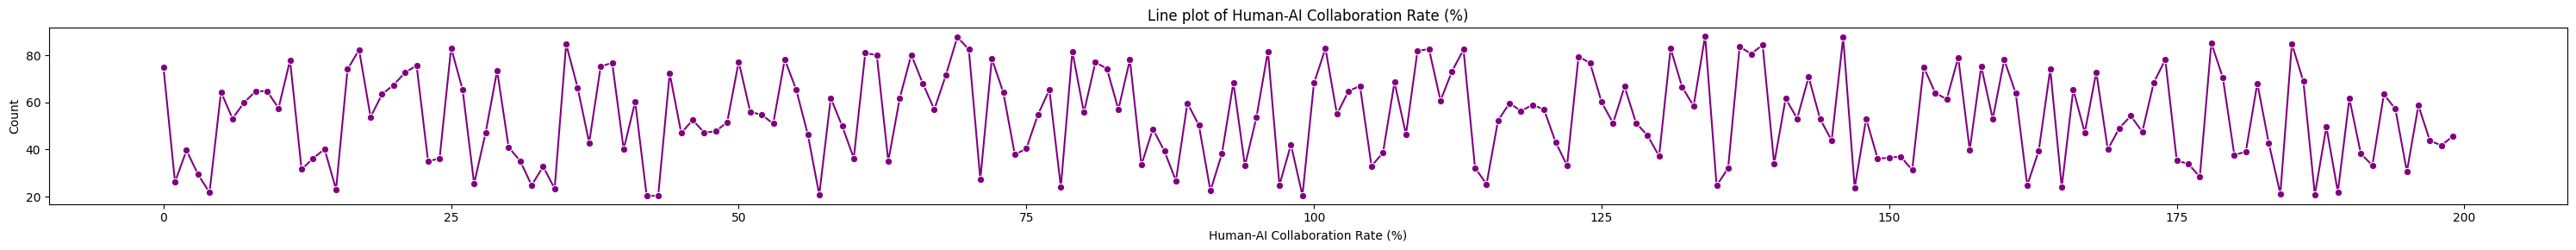

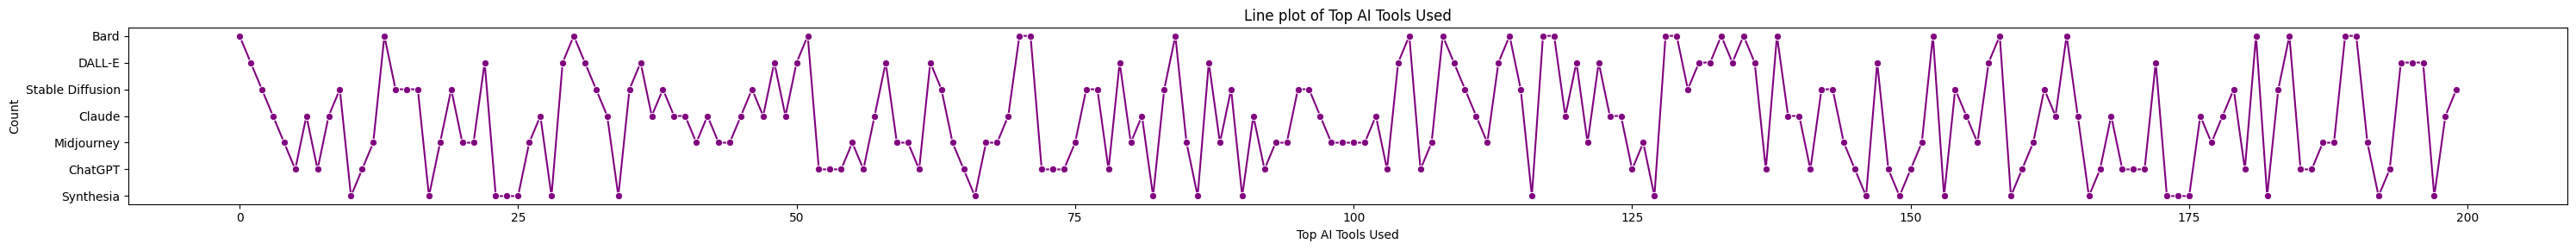

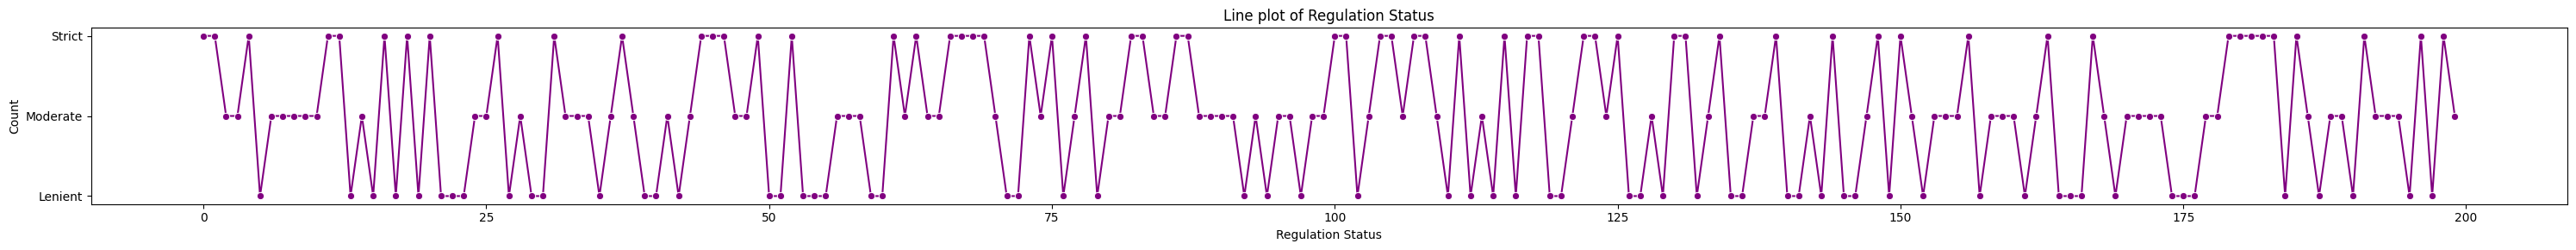

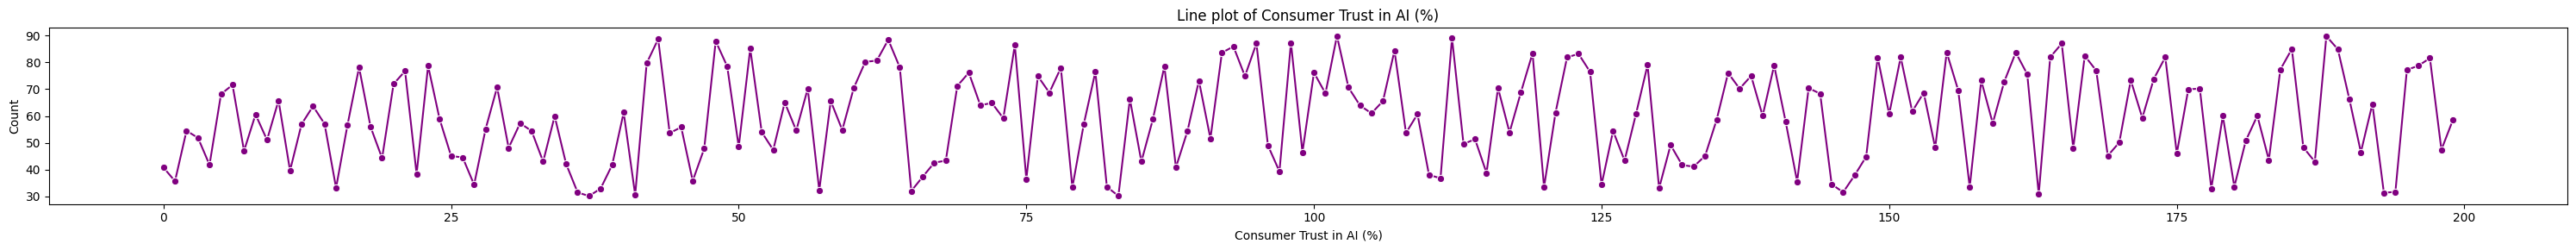

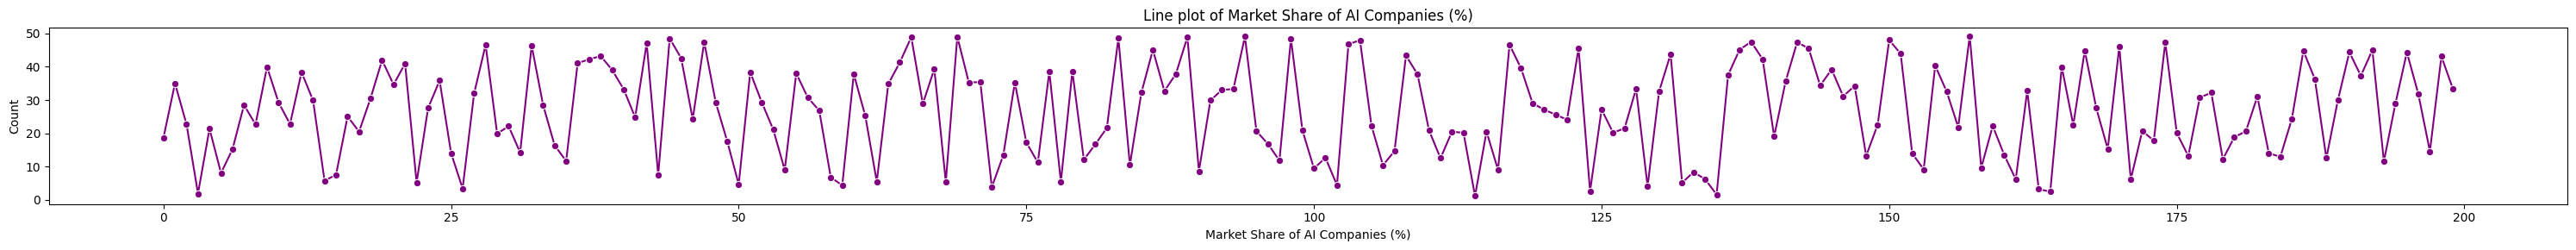

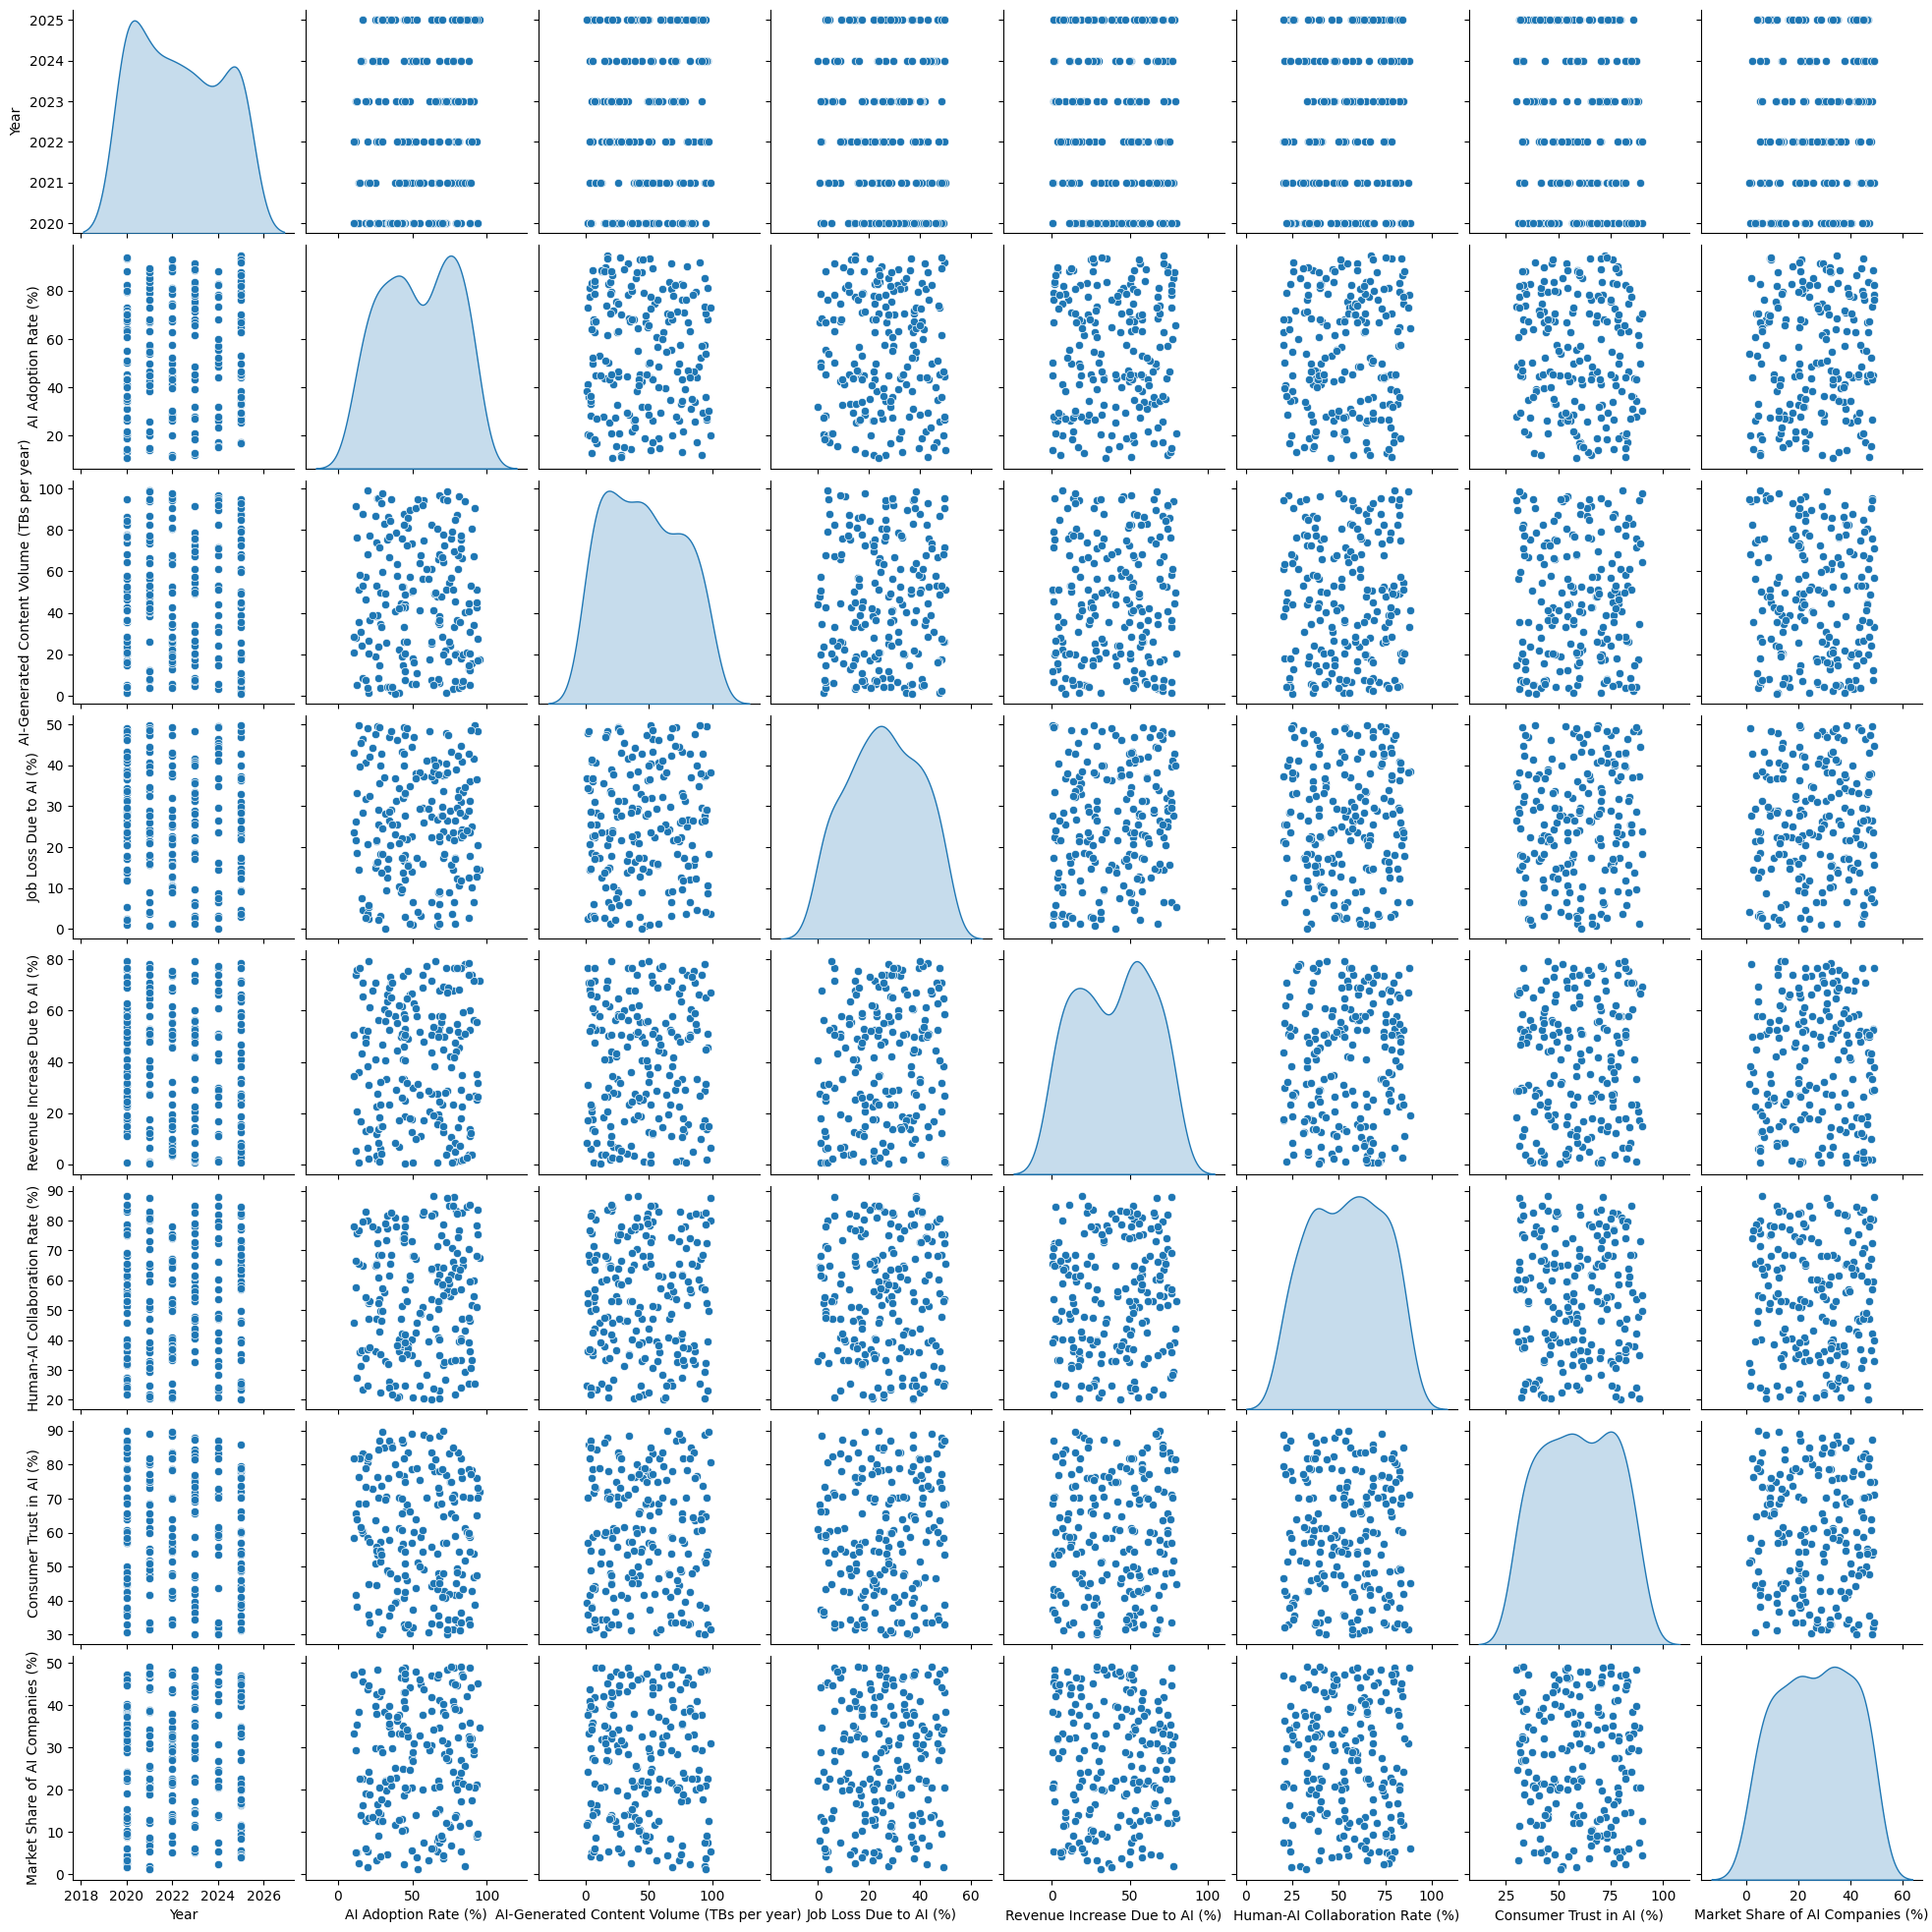

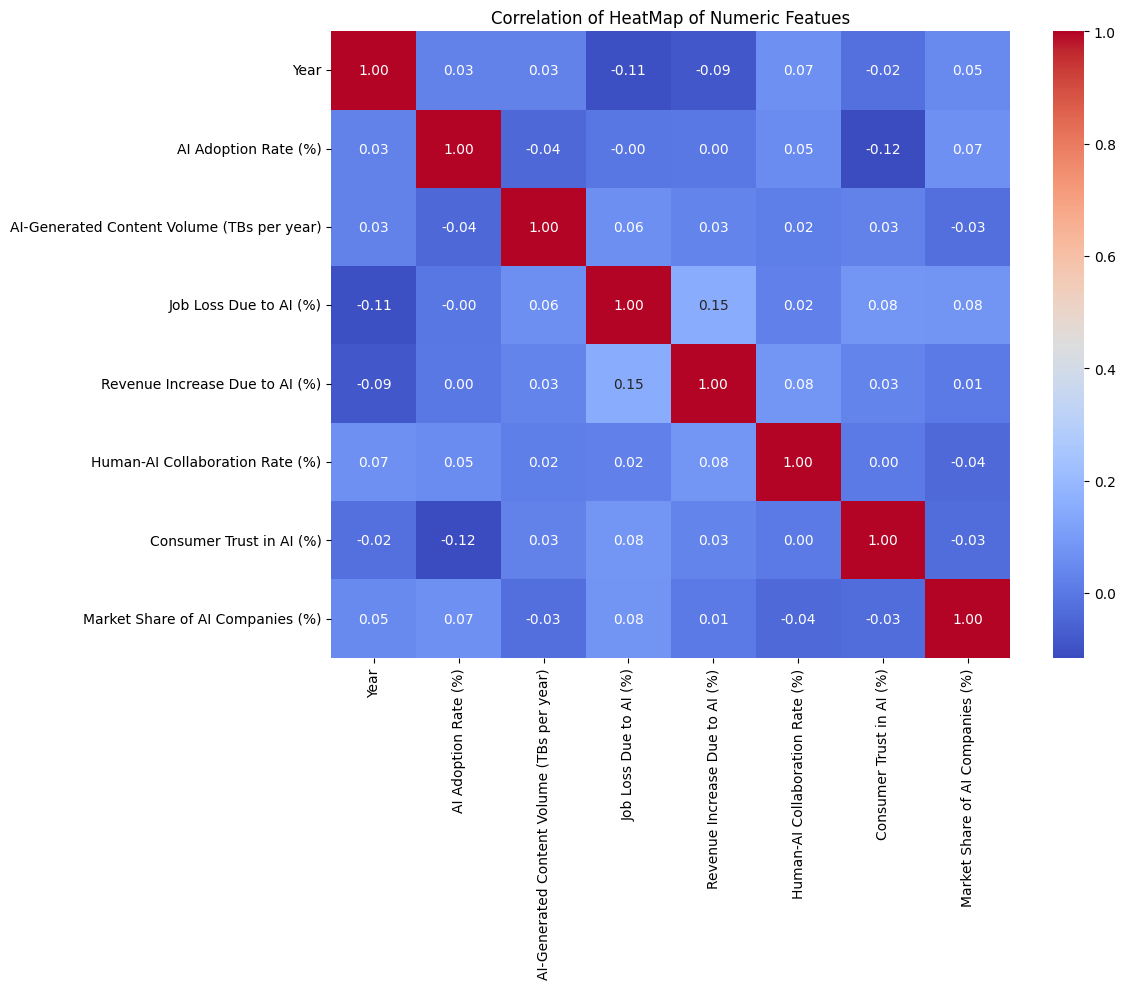

In [9]:
# COUNT PLOT

cols = ['Country', 'Year', 'Industry','Top AI Tools Used', 'Regulation Status' ]

for features in cols:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.countplot(x=features,data=df)
        plt.title(f'Count plot of {features}')
        plt.tight_layout()
        plt.show()




# HISTOGRAM PLOT

feat = ['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)']
for features in feat:
    if features in df.columns:
        plt.figure(figsize=(12,5))
        sns.histplot(df[features].dropna(),kde=True,color='green')
        plt.title(f'Historgam plot of {features}')
        plt.xlabel(features)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()



# LINE PLOT

for features in feat:
    if features in df.columns:
        plt.figure(figsize=(30,3))
        sns.lineplot(df[features].dropna(),marker='o',color='purple')
        plt.title(f'Line plot of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()


# Pair Plot
        
if set(feat).issubset(df.columns):
    sns.pairplot(df[feat].dropna(),diag_kind='kde')
    plt.show()



# HEAT-MAP

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >=4:
    plt.figure(figsize=(12,10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title('Correlation of HeatMap of Numeric Featues')
    plt.tight_layout()
    plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

# DATA PROCESSING

In [11]:
df['Top AI Tools Used'].value_counts()

Top AI Tools Used
Midjourney          37
Claude              31
ChatGPT             31
Stable Diffusion    27
DALL-E              26
Bard                24
Synthesia           24
Name: count, dtype: int64

In [12]:
lab = ['Country','Industry','Top AI Tools Used','Regulation Status']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
for column in lab:
    df[column] = le.fit_transform(df[column])

In [16]:
df

Country  Year  Industry  AI Adoption Rate (%)  \
0          7  2022         8                 44.29   
1          2  2025         5                 34.75   
2          9  2022         0                 81.06   
3          3  2021         5                 85.24   
4          3  2021         3                 78.95   
..       ...   ...       ...                   ...   
195        4  2021         0                 89.44   
196        4  2020         8                 70.11   
197        3  2023         7                 65.77   
198        0  2023         0                 45.35   
199        7  2020         4                 10.53   

     AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                         33.09                   16.77   
1                                         66.74                   46.89   
2                                         96.13                   10.66   
3                                         93.76                   27.70   
4                                         45.62                   17.45   
..                                          ...                     ...   
195                                       52.98                   48.47   
196                                       28.26                   27.62   
197                                       49.83                   39.94   
198                                       20.49                   33.21   
199                                       20.97                   23.64   

     Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                             46.12                            74.79   
1                             52.46                            26.17   
2                             45.60                            39.66   
3                             78.24                            29.45   
4                              1.05                            21.70   
..                              ...                              ...   
195                           12.14                            30.60   
196                           57.86                            58.71   
197                           79.44                            43.73   
198                           50.50                            41.73   
199                           34.27                            45.67   

     Top AI Tools Used  Regulation Status  Consumer Trust in AI (%)  \
0                    0                  2                     40.77   
1                    3                  2                     35.67   
2                    5                  1                     54.47   
3                    2                  1                     51.84   
4                    4                  2                     41.77   
..                 ...                ...                       ...   
195                  3                  0                     77.21   
196                  3                  2                     78.74   
197                  6                  0                     81.58   
198                  2                  2                     47.42   
199                  5                  1                     58.52   

     Market Share of AI Companies (%)  
0                               18.73  
1                               35.02  
2                               22.76  
3                                1.93  
4                               21.41  
..                                ...  
195                             44.35  
196                             31.73  
197                             14.62  
198                             43.11  
199                             33.37  

[200 rows x 12 columns]

In [17]:
df['Job Loss Due to AI (%)'].value_counts()

Job Loss Due to AI (%)
12.61    2
28.82    2
37.69    2
42.89    2
38.22    1
        ..
6.54     1
40.84    1
33.17    1
37.59    1
23.06    1
Name: count, Length: 196, dtype: int64

In [18]:
df =  df.astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Country                                     200 non-null    int64
 1   Year                                        200 non-null    int64
 2   Industry                                    200 non-null    int64
 3   AI Adoption Rate (%)                        200 non-null    int64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    int64
 5   Job Loss Due to AI (%)                      200 non-null    int64
 6   Revenue Increase Due to AI (%)              200 non-null    int64
 7   Human-AI Collaboration Rate (%)             200 non-null    int64
 8   Top AI Tools Used                           200 non-null    int64
 9   Regulation Status                           200 non-null    int64
 10  Consumer Trust in AI (%)              

In [20]:
df

Country  Year  Industry  AI Adoption Rate (%)  \
0          7  2022         8                    44   
1          2  2025         5                    34   
2          9  2022         0                    81   
3          3  2021         5                    85   
4          3  2021         3                    78   
..       ...   ...       ...                   ...   
195        4  2021         0                    89   
196        4  2020         8                    70   
197        3  2023         7                    65   
198        0  2023         0                    45   
199        7  2020         4                    10   

     AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                            33                      16   
1                                            66                      46   
2                                            96                      10   
3                                            93                      27   
4                                            45                      17   
..                                          ...                     ...   
195                                          52                      48   
196                                          28                      27   
197                                          49                      39   
198                                          20                      33   
199                                          20                      23   

     Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                                46                               74   
1                                52                               26   
2                                45                               39   
3                                78                               29   
4                                 1                               21   
..                              ...                              ...   
195                              12                               30   
196                              57                               58   
197                              79                               43   
198                              50                               41   
199                              34                               45   

     Top AI Tools Used  Regulation Status  Consumer Trust in AI (%)  \
0                    0                  2                        40   
1                    3                  2                        35   
2                    5                  1                        54   
3                    2                  1                        51   
4                    4                  2                        41   
..                 ...                ...                       ...   
195                  3                  0                        77   
196                  3                  2                        78   
197                  6                  0                        81   
198                  2                  2                        47   
199                  5                  1                        58   

     Market Share of AI Companies (%)  
0                                  18  
1                                  35  
2                                  22  
3                                   1  
4                                  21  
..                                ...  
195                                44  
196                                31  
197                                14  
198                                43  
199                                33  

[200 rows x 12 columns]

In [21]:
df.columns

Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')

In [22]:
per = ['AI Adoption Rate (%)', 'Job Loss Due to AI (%)','Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)', 
       'Consumer Trust in AI (%)','Market Share of AI Companies (%)']

In [23]:
df[per] = df[per]/100

In [24]:
df['AI-Generated Content Volume (TBs per year)']  = (df['AI-Generated Content Volume (TBs per year)']/12).round(2)

In [25]:
df

Country  Year  Industry  AI Adoption Rate (%)  \
0          7  2022         8                  0.44   
1          2  2025         5                  0.34   
2          9  2022         0                  0.81   
3          3  2021         5                  0.85   
4          3  2021         3                  0.78   
..       ...   ...       ...                   ...   
195        4  2021         0                  0.89   
196        4  2020         8                  0.70   
197        3  2023         7                  0.65   
198        0  2023         0                  0.45   
199        7  2020         4                  0.10   

     AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                          2.75                    0.16   
1                                          5.50                    0.46   
2                                          8.00                    0.10   
3                                          7.75                    0.27   
4                                          3.75                    0.17   
..                                          ...                     ...   
195                                        4.33                    0.48   
196                                        2.33                    0.27   
197                                        4.08                    0.39   
198                                        1.67                    0.33   
199                                        1.67                    0.23   

     Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                              0.46                             0.74   
1                              0.52                             0.26   
2                              0.45                             0.39   
3                              0.78                             0.29   
4                              0.01                             0.21   
..                              ...                              ...   
195                            0.12                             0.30   
196                            0.57                             0.58   
197                            0.79                             0.43   
198                            0.50                             0.41   
199                            0.34                             0.45   

     Top AI Tools Used  Regulation Status  Consumer Trust in AI (%)  \
0                    0                  2                      0.40   
1                    3                  2                      0.35   
2                    5                  1                      0.54   
3                    2                  1                      0.51   
4                    4                  2                      0.41   
..                 ...                ...                       ...   
195                  3                  0                      0.77   
196                  3                  2                      0.78   
197                  6                  0                      0.81   
198                  2                  2                      0.47   
199                  5                  1                      0.58   

     Market Share of AI Companies (%)  
0                                0.18  
1                                0.35  
2                                0.22  
3                                0.01  
4                                0.21  
..                                ...  
195                              0.44  
196                              0.31  
197                              0.14  
198                              0.43  
199                              0.33  

[200 rows x 12 columns]

In [26]:
df = df.drop(columns=['Year','Regulation Status','Top AI Tools Used'],axis=0)

# MODELS

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor

In [29]:
X = df.drop(columns=['Job Loss Due to AI (%)'])
y = df['Job Loss Due to AI (%)']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
# Scale data (very important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, 
    accuracy_score, precision_score, recall_score, f1_score
)

In [33]:
# Define models
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "RandomForest Regressor": RandomForestRegressor(max_depth= 200, min_samples_split= 200, n_estimators= 1000),
    "GradientBoosting Regressor": GradientBoostingRegressor(learning_rate =0.001,max_depth=200),
    "SVR": SVR(C=1,gamma=0.01,kernel='linear'),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(),
    "XGB Regressor": XGBRegressor(n_estimators=200,learning_rate=0.05, max_depth=6),  # XGBoost uses scale_pos_weight
    "LGBM Regressor": LGBMRegressor(class_weight='balanced'),


    # "Decision Tree Classifier": DecisionTreeClassifier(class_weight='balanced'),
    # "RandomForest Classifier": RandomForestClassifier(class_weight='balanced',max_depth= 20, min_samples_split= 2, n_estimators= 100),
    # "GradientBoosting Classifier": GradientBoostingClassifier(learning_rate =0,max_depth=10),
    # "AdaBoost Classifier": AdaBoostClassifier(),
    # "SVC": SVC(class_weight='balanced',C= 100, gamma= 'auto', kernel= 'rbf'),
    # "KNeighbors Classifier": KNeighborsClassifier(),
    # "MLP Classifier": MLPClassifier(),
    # "XGB Classifier": XGBClassifier(scale_pos_weight=3654/1045),  # XGBoost uses scale_pos_weight
    # "LGBM Classifier": LGBMClassifier(class_weight='balanced')
}

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import RegressorMixin, ClassifierMixin

In [35]:
# Store results
results = {}

# Train & evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # **Check if the model is a classifier or regressor**
    if isinstance(model, ClassifierMixin):  
        # Classification Metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        results[name] = {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1}

    elif isinstance(model, RegressorMixin):  
        # Regression Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MAE": mae, "MSE": mse, "R² Score": r2}

print('-' * 120)
# Print results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
print('-' * 120)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 8
[LightGBM] [Info] Start training from score 0.245532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [36]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance

AI Adoption Rate (%)                          92
Consumer Trust in AI (%)                      78
Revenue Increase Due to AI (%)                70
Country                                       67
Market Share of AI Companies (%)              66
AI-Generated Content Volume (TBs per year)    59
Human-AI Collaboration Rate (%)               48
Industry                                      43
dtype: int32

In [37]:
# df = df.drop(columns=['Year','Regulation Status','Top AI Tools Used'],axis=0)

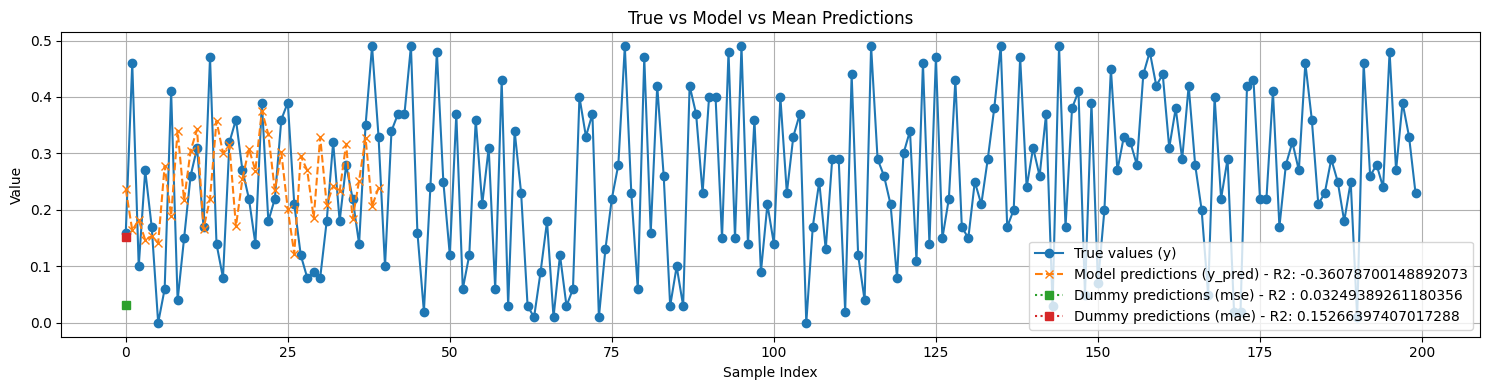

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.plot(y, label="True values (y)", marker='o')
plt.plot(y_pred, label=f"Model predictions (y_pred) - R2: {r2}", linestyle='--', marker='x')
plt.plot(mse, label=f"Dummy predictions (mse) - R2 : {mse}", linestyle=':', marker='s')
plt.plot(mae, label=f"Dummy predictions (mae) - R2: {mae}", linestyle=':', marker='s')
plt.title("True vs Model vs Mean Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tuening Randomforest

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [40]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [43]:
y_pred_rff = rf_random.predict(X_test_scaled) 

In [44]:
maee = mean_absolute_error(y_test, y_pred_rff)
msee = mean_squared_error(y_test, y_pred_rff)
r22 = r2_score(y_test, y_pred_rff)
print(f'mae:',{maee})
print(f'mse:',{msee})
print(f'r2',{r22})

mae: {0.13679740615871971}
mse: {0.026471988136653156}
r2 {-0.10860024652266809}


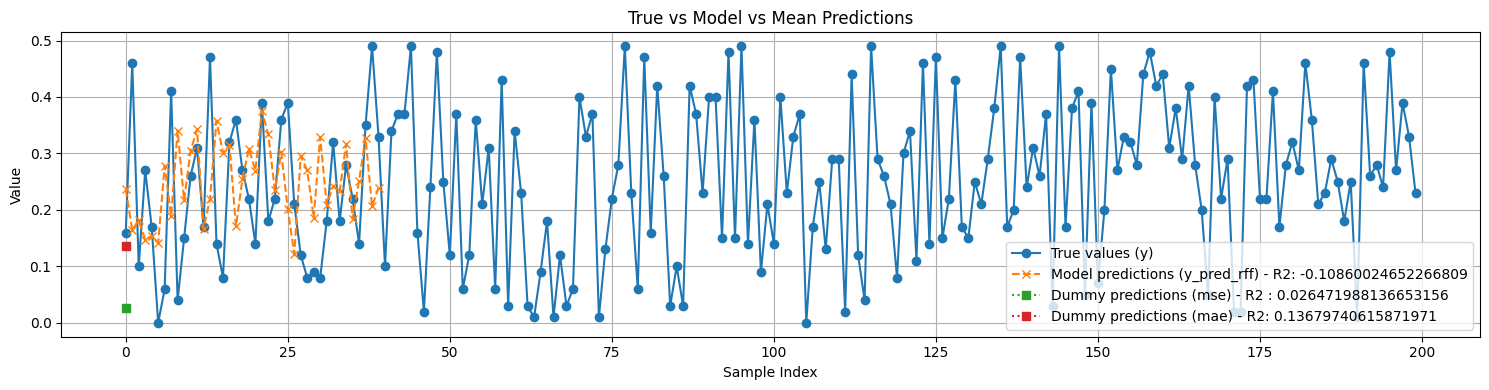

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.plot(y, label="True values (y)", marker='o')
plt.plot(y_pred, label=f"Model predictions (y_pred_rff) - R2: {r22}", linestyle='--', marker='x')
plt.plot(msee, label=f"Dummy predictions (mse) - R2 : {msee}", linestyle=':', marker='s')
plt.plot(maee, label=f"Dummy predictions (mae) - R2: {maee}", linestyle=':', marker='s')
plt.title("True vs Model vs Mean Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
df

Country  Industry  AI Adoption Rate (%)  \
0          7         8                  0.44   
1          2         5                  0.34   
2          9         0                  0.81   
3          3         5                  0.85   
4          3         3                  0.78   
..       ...       ...                   ...   
195        4         0                  0.89   
196        4         8                  0.70   
197        3         7                  0.65   
198        0         0                  0.45   
199        7         4                  0.10   

     AI-Generated Content Volume (TBs per year)  Job Loss Due to AI (%)  \
0                                          2.75                    0.16   
1                                          5.50                    0.46   
2                                          8.00                    0.10   
3                                          7.75                    0.27   
4                                          3.75                    0.17   
..                                          ...                     ...   
195                                        4.33                    0.48   
196                                        2.33                    0.27   
197                                        4.08                    0.39   
198                                        1.67                    0.33   
199                                        1.67                    0.23   

     Revenue Increase Due to AI (%)  Human-AI Collaboration Rate (%)  \
0                              0.46                             0.74   
1                              0.52                             0.26   
2                              0.45                             0.39   
3                              0.78                             0.29   
4                              0.01                             0.21   
..                              ...                              ...   
195                            0.12                             0.30   
196                            0.57                             0.58   
197                            0.79                             0.43   
198                            0.50                             0.41   
199                            0.34                             0.45   

     Consumer Trust in AI (%)  Market Share of AI Companies (%)  
0                        0.40                              0.18  
1                        0.35                              0.35  
2                        0.54                              0.22  
3                        0.51                              0.01  
4                        0.41                              0.21  
..                        ...                               ...  
195                      0.77                              0.44  
196                      0.78                              0.31  
197                      0.81                              0.14  
198                      0.47                              0.43  
199                      0.58                              0.33  

[200 rows x 9 columns]

# CONCLUSTION:
> RESULTS ARE STILL NOT GOOD AFTER THE HYPER-PARAMETER TUENING.